In [1]:
import tensorflow as tf
import numpy as np
from utils.data_sampler import CustomDataGenerator
from utils.loader import DataLoader
import matplotlib.pyplot as plt 

2022-06-08 12:45:01.223761: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def load_VGG_model(img_height: int, img_width: int, lr: int, loss: tf.keras.losses.Loss, metrics, trainable = True) -> tf.keras.Model:
    """ Loads VGG-16 model.

    Args:
        img_height (int): Image height.
        img_width (int): Image width.
        lr (int): Learning rate.
        loss (tf.keras.losses.Loss): Model loss.
        metrics (List[str]): Training metrics.
        trainable (True): Set if model weights should be kept frozen or not.

    Returns:
        tf.keras.Model: TensorFlow VGG-16 model.
    """
    model = tf.keras.applications.vgg16.VGG16(input_shape=(img_height, img_width, 3))
    model.trainable = trainable
    model.compile(optimizer=tf.keras.optimizers.Adam(lr, epsilon=0.1),
                loss=loss,
                metrics=metrics)

    return model

In [ ]:
model = load_VGG_model(img_height=224, img_width=224, lr=1e-3, loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'], trainable=True)

In [ ]:
model.summary()

In [ ]:
model.get_layer('block4_conv2').weights

In [ ]:
model.get_layer('block4_conv3').weights[0]

In [18]:
kernel = model.get_layer('block4_conv2').kernel
flat_kernel = tf.reshape(kernel, [-1, kernel.shape[-1]]).numpy()

In [9]:
def retrieve_pcs(data, n_comp):
    svd = np.linalg.svd(data, full_matrices=True) # Take full matrix - P is already ready
    U = svd[0]
    S = np.vstack([np.diag(svd[1]), np.zeros((svd[0].shape[0]-normalised_fk.shape[1], svd[1].shape[0]))]) # Reconstruct true S matrix
    VT = svd[2]

    # Extract the top n_comp principal components
    U_f = U[:, :n_comp]
    S_f = S[:n_comp, :n_comp]
    V_f = VT[:n_comp, :] # rows of VT contain the principle axes

    return U_f, S_f, V_f

In [21]:
np.sum(flat_kernel < 0)/(np.sum(flat_kernel < 0)+np.sum(flat_kernel >= 0))

0.5515496995713975

In [11]:
normalised_fk = ((flat_kernel - np.mean(flat_kernel, axis=0)) / np.std(flat_kernel, axis=0))

In [12]:
normalised_fk

array([[-0.47356775,  0.9964931 , -0.366997  , ...,  0.10261818,
        -0.22818987, -0.67181444],
       [-1.2562613 ,  0.27372184, -2.168791  , ..., -0.05774497,
         0.28303346, -0.17115875],
       [-0.3843452 ,  1.105049  ,  0.30593503, ..., -0.11172152,
        -0.3392385 , -0.43106142],
       ...,
       [-1.5171409 , -0.4862765 , -0.17330946, ...,  1.0651499 ,
        -0.3395577 , -0.13222383],
       [-0.45295414,  1.5776945 ,  0.06654418, ..., -0.9407903 ,
        -0.23414461,  0.79637265],
       [-0.02400994,  0.25037593,  0.18429938, ..., -1.4657224 ,
        -0.29597014,  2.2449188 ]], dtype=float32)

In [10]:
svd = np.linalg.svd(normalised_fk, full_matrices=True) # Take full matrix - P is already ready

In [68]:
svd[0].shape

(4608, 4608)

In [11]:
# this makes the S matrix weird shaped : 4608 x 512 reconstruct here
U = svd[0]
S = np.vstack([np.diag(svd[1]), np.zeros((svd[0].shape[0]-normalised_fk.shape[1], svd[1].shape[0]))])
VT = svd[2]

In [ ]:
U@S

In [13]:
VT

array([[ 0.06251427,  0.04678614,  0.05803623, ...,  0.05990395,
        -0.00826131,  0.04228775],
       [-0.00412224,  0.04498556,  0.00158754, ...,  0.05367128,
        -0.05180591,  0.04351665],
       [ 0.03260566, -0.02617242, -0.00114157, ..., -0.03950515,
        -0.039504  , -0.04606383],
       ...,
       [ 0.01891089, -0.0116815 ,  0.05607558, ..., -0.00898743,
         0.0159458 , -0.04283111],
       [-0.03118331,  0.05198725,  0.04353941, ..., -0.03327896,
         0.03001467, -0.02536287],
       [ 0.00191169,  0.03139377, -0.07290125, ..., -0.03662665,
        -0.01546492,  0.03153231]], dtype=float32)

In [15]:
from sklearn.decomposition import NMF

In [16]:
nmf = NMF()

In [19]:
flat_kernel

<tf.Tensor: shape=(4608, 512), dtype=float32, numpy=
array([[-4.1355654e-03,  7.4719540e-03, -3.5011589e-03, ...,
         4.8985430e-06, -2.5383946e-03, -5.2532647e-03],
       [-9.5383441e-03,  1.4105609e-03, -1.6544206e-02, ...,
        -1.5277497e-03,  1.1103683e-03, -1.7978617e-03],
       [-3.5196797e-03,  8.3823400e-03,  1.3701437e-03, ...,
        -2.0436230e-03, -3.3309839e-03, -3.5916462e-03],
       ...,
       [-1.1339144e-02, -4.9630310e-03, -2.0990700e-03, ...,
         9.2041595e-03, -3.3332622e-03, -1.5291425e-03],
       [-3.9932737e-03,  1.2346098e-02, -3.6278801e-04, ...,
        -9.9673308e-03, -2.5808956e-03,  4.8798025e-03],
       [-1.0323566e-03,  1.2147743e-03,  4.8963266e-04, ...,
        -1.4984296e-02, -3.0221639e-03,  1.4877313e-02]], dtype=float32)>

In [ ]:
w, h = nmf.fit_transform(flat_kernel.numpy()), nmf.components_

In [ ]:
h.shape

In [83]:
n_comp = 20
U_f = U[:, :n_comp]
S_f = S[:n_comp, :n_comp]
V_f = VT[:n_comp, :] # rows of VT contain the principle axes

In [75]:
U.shape

(4608, 4608)

In [77]:
cov = np.cov(normalised_fk.transpose())

# Eigen Values
EigVal,EigVec = np.linalg.eig(cov)

In [78]:
order = EigVal.argsort()[::-1]
EigVal = EigVal[order]
EigVec = EigVec[:,order]

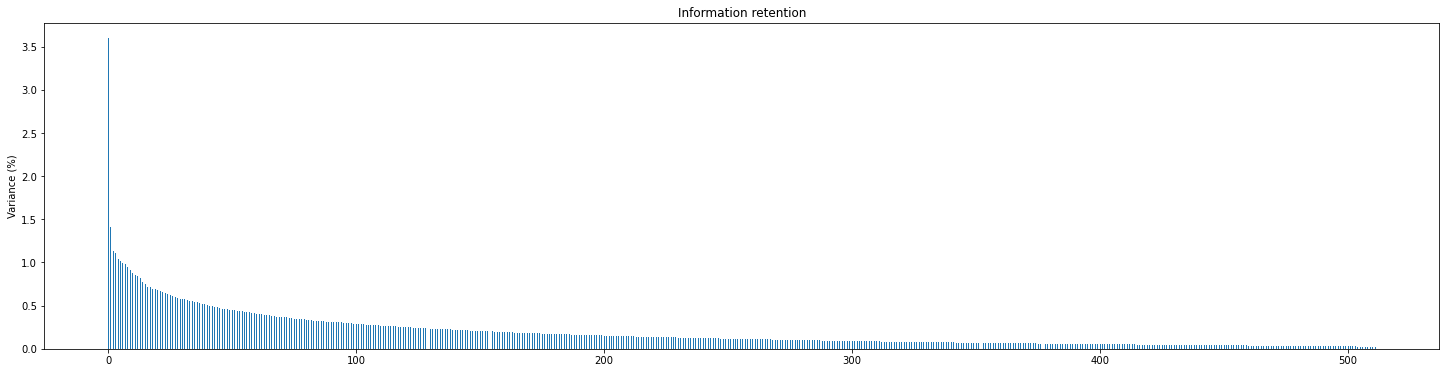

In [91]:
fig, ax = plt.subplots(figsize=(25,6))
ax.bar(list(range(512)),EigVal/sum(EigVal)*100,align='center',width=0.4,)
ax.set_ylabel('Variance (%)')
ax.set_title('Information retention')
fig.savefig('information.png')

In [25]:
normalised_fk.shape

(4608, 512)

In [3]:
batch_size = 16
img_height = 224
img_width = 224
# Set augmentation and pre-processing
train_datagen = CustomDataGenerator(
                channel_shift_range = 0.2,
                horizontal_flip=True,
                validation_split=0.2,
                preprocessing_function=tf.keras.applications.vgg16.preprocess_input, dtype=tf.float32)
test_datagen = CustomDataGenerator(
                preprocessing_function=tf.keras.applications.vgg16.preprocess_input, dtype=tf.float32)

# Load ImageNet dataset with the VGG augmentation
loader = DataLoader(batch_size, (img_height, img_width))
train_set = loader.load_train_set(aug_train=train_datagen, class_mode='sparse', shuffle=True)
val_set = loader.load_val_set(aug_val=train_datagen, class_mode='sparse', shuffle=True)
test_set = loader.load_test_set(aug_test=test_datagen, set_batch_size=False)

Loading train set...
Found 1024977 images belonging to 1000 classes.
Loading validation set...
Found 256190 images belonging to 1000 classes.
Loading test set...
Found 48238 images belonging to 1000 classes.


In [14]:
train_set.set_target_sampling(['n01440764'], [1])
a = train_set.next()[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

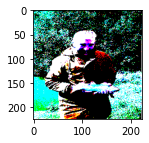

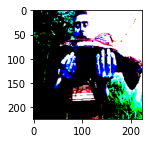

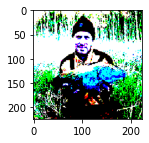

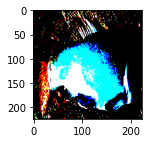

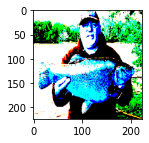

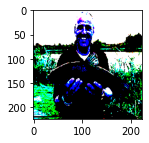

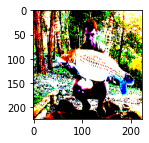

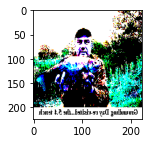

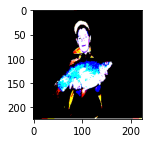

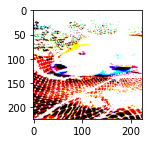

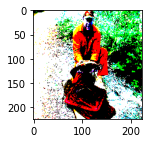

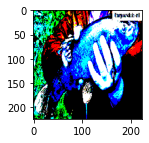

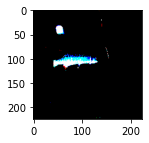

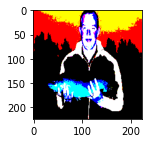

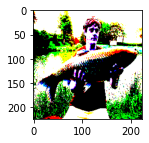

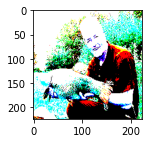

In [25]:
for i in range(batch_size):
    fig, ax = plt.subplots(figsize=(2,2))
    ax.imshow(a[i]*255)